In [884]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
import seaborn as sns

Question 1

# A)

Parameters

In [885]:
t0 = 0
tN = 100
t = np.linspace(t0, tN, 1000)  

Numerical Solution

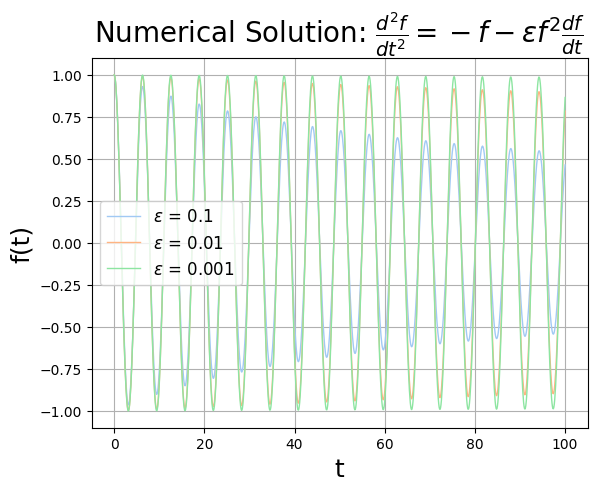

In [886]:
for epsilon in [0.1, 0.01, 0.001]:
  def system(t, u):
      u1, u2 = u
      du1_dt = u2
      du2_dt = -u1 - epsilon*(u1**2)*(u2)
      return [du1_dt, du2_dt]

  # Initial conditions
  u1_0 = 1  # u(0) = 1
  u2_0 = 0  # du/dt(0) = 0
  y0 = [u1_0, u2_0]
  # solve
  sol = solve_ivp(system, (t0, tN), y0, t_eval=t, method='RK45')
  ts_numerical = sol.t
  us_numerical = sol.y[0]

  plt.plot(ts_numerical, us_numerical, linewidth = 1, label = rf"$\epsilon$ = {epsilon}")
  plt.xlabel("t", fontsize = 18)
  plt.ylabel(rf"f(t)", fontsize = 18)
  plt.title(r"Numerical Solution: $\frac{d^2f}{dt^2} = -f - \epsilon f^2 \frac{df}{dt}$", fontsize = 20)
  plt.grid()
  plt.legend(loc = "best", fontsize = 12)
plt.show()

Multiscale Solution

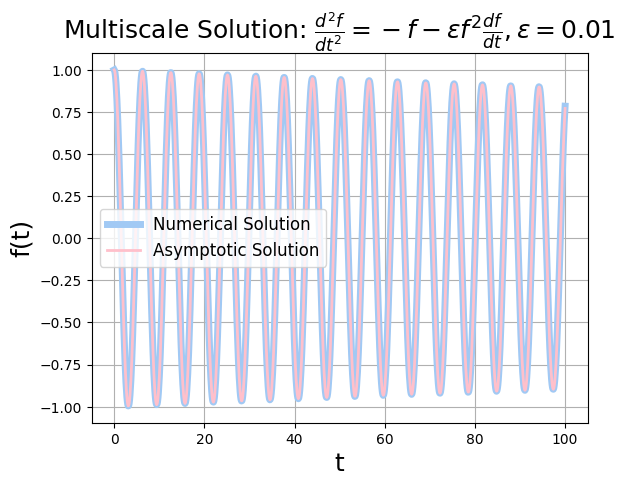

In [887]:
plt.clf()
epsilon = 0.01

#initial conditions
u1_0 = 1  # u(0) = 1
u2_0 = 0  # du/dt(0) = 0
y0 = [u1_0, u2_0]

#numerical solution
sol = solve_ivp(system, (t0, tN), y0, t_eval=t, method='RK45')
ts_numerical = sol.t
us_numerical = sol.y[0]

#multiscale solution
def multiscale_soln(t):
  u = 2*np.cos(t)/np.sqrt((4)+epsilon*t)
  return u 
multiscale_solution = multiscale_soln(t)

#plotting
plt.title(r"Multiscale Solution: $\frac{d^2f}{dt^2} = -f - \epsilon f^2 \frac{df}{dt}, \epsilon = 0.01$", fontsize = 18)
plt.xlabel("t", fontsize = 18)
plt.ylabel(rf"f(t)", fontsize = 18)
plt.grid()
plt.plot(ts_numerical, us_numerical, linewidth = 5, label = rf"Numerical Solution")
plt.plot(t, multiscale_solution, label = "Asymptotic Solution", linewidth = 2, color = "pink")
plt.legend(loc = "best", fontsize = 12)

# B)

Parameters

In [888]:
t0 = 0
tN = 100
t = np.linspace(t0, tN, 100000)  

Numerical Solution

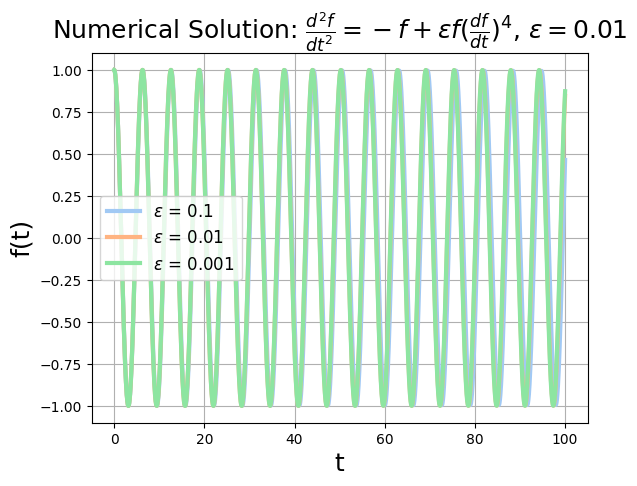

In [889]:
for epsilon in [0.1, 0.01, 0.001]:
  def system(t, u):
      u1, u2 = u
      du1_dt = u2
      du2_dt = -u1 + (epsilon*u1*(u2**4))
      return [du1_dt, du2_dt]

  # Initial conditions
  u1_0 = 1  # u(0) = 1
  u2_0 = 0  # du/dt(0) = 0
  y0 = [u1_0, u2_0]
  # solve
  sol = solve_ivp(system, (t0, tN), y0, t_eval=t, method='RK45')
  ts_numerical = sol.t
  us_numerical = sol.y[0]

  plt.plot(ts_numerical, us_numerical, linewidth = 3, label = rf"$\epsilon$ = {epsilon}")
  plt.xlabel("t", fontsize = 18)
  plt.ylabel(rf"f(t)", fontsize = 18)
  plt.title(r"Numerical Solution: $\frac{d^2f}{dt^2} = -f + \epsilon f(\frac{df}{dt})^4$, $\epsilon = 0.01$", fontsize = 18)
  plt.grid()
  plt.legend(loc = "best", fontsize = 12)
plt.show()

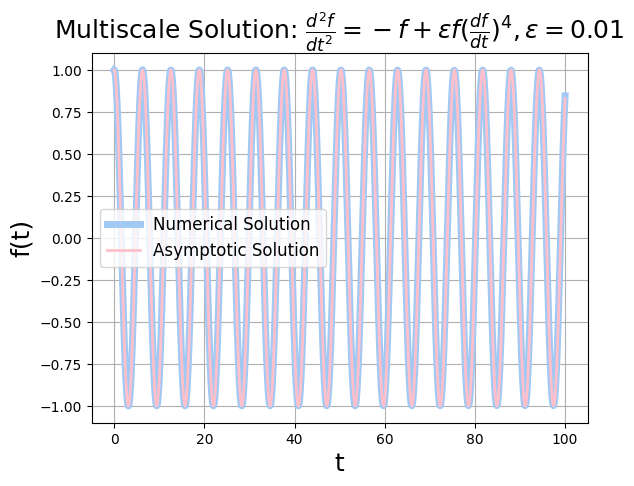

In [890]:
plt.clf()
epsilon = 0.01



#numerical solution
sol = solve_ivp(system, (t0, tN), y0, t_eval=t, method='RK45')
ts_numerical = sol.t
us_numerical = sol.y[0]

#multiscale solution
def multiscale_soln(t):
  #u = np.cos(t)
  u = np.cos(-(1/16)*epsilon*t + t)
  return u 
multiscale_solution = multiscale_soln(t)

#plotting
plt.title(r"Multiscale Solution: $\frac{d^2f}{dt^2} = -f + \epsilon f(\frac{df}{dt})^4, \epsilon = 0.01$", fontsize = 18)
plt.xlabel("t", fontsize = 18)
plt.ylabel(rf"f(t)", fontsize = 18)
plt.grid()
plt.plot(ts_numerical, us_numerical, linewidth = 5, label = rf"Numerical Solution")
plt.plot(t, multiscale_solution, label = "Asymptotic Solution", linewidth = 2, color = "pink")
plt.legend(loc = "best", fontsize = 12)

# C)

Text(0.5, 1.0, 'Numerical Solution: $\\epsilon\\frac{d^2f}{dt^2} + \\frac{df}{dt} + (t+1)f = 0$')

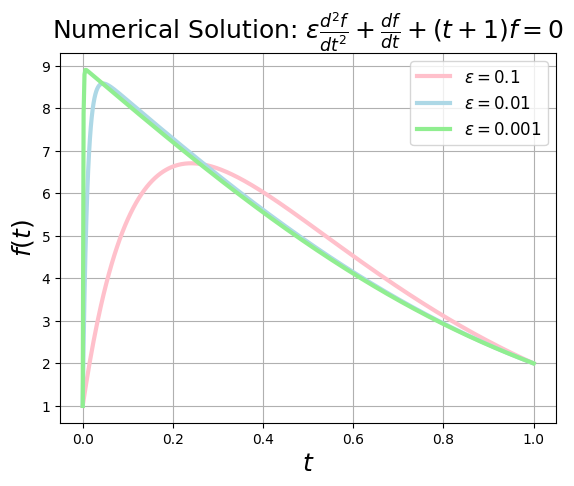

In [891]:
plt.clf()
x0, xN = 0, 1  # Define the domain boundaries
fL, fR = 1, 2 # f(0) = 1, f(L) = 3    
sns.set_palette("pastel")
color_dict = {0.1: "pink", 0.01: "lightblue", 0.001: "lightgreen"}


def ode(epsilon):
    def system(x, y):
        f = y[0]
        df_dx = y[1]
        d2f_dx2 = (1/epsilon)*(-df_dx - (x+1)*f)
        return np.vstack((df_dx, d2f_dx2))
    return system

def boundary_conditions(ya, yb):
    return np.array([ya[0] - fL, yb[0] - fR])  

for epsilon in [0.1, 0.01, 0.001]:
    x_guess = np.linspace(x0, xN, 100)  #
    y_guess = np.zeros((2, x_guess.size))  
    y_guess[0] = x_guess  

    solution = solve_bvp(ode(epsilon), boundary_conditions, x_guess, y_guess)

    x_fine = np.linspace(x0, xN, 500)
    y_fine = solution.sol(x_fine)

    sns.lineplot(x=x_fine, y=y_fine[0], label=rf"$\epsilon = {epsilon}$", linewidth=3, color = color_dict[epsilon])
    #sns.scatterplot(x=x_fine, y=y_fine[0], edgecolor = color_dict[epsilon], marker = "o", facecolor="none", s = 80)
#Labeling
plt.legend(fontsize = 12)
plt.grid()
plt.xlabel(r"$t$", fontsize=18)
plt.ylabel(r"$f(t)$", fontsize=18)
plt.title(r"Numerical Solution: $\epsilon\frac{d^2f}{dt^2} + \frac{df}{dt} + (t+1)f = 0$", fontsize=18)

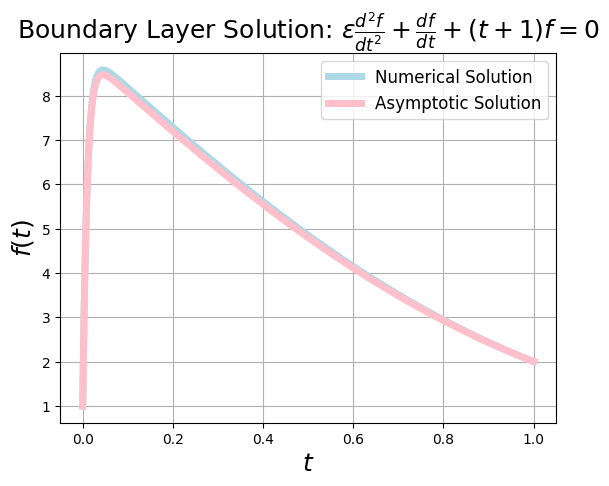

In [892]:
x = np.linspace(x0, xN, 1000)
color_dict = {0.1: "pink", 0.01: "lightblue", 0.001: "lightgreen"}
for epsilon in [0.01]:
    x_guess = np.linspace(x0, xN, 100)  #
    y_guess = np.zeros((2, x_guess.size))  
    y_guess[0] = x_guess  

    solution = solve_bvp(ode(epsilon), boundary_conditions, x_guess, y_guess)

    x_fine = np.linspace(x0, xN, 500)
    y_fine = solution.sol(x_fine)

    sns.lineplot(x=x_fine, y=y_fine[0], label=rf"Numerical Solution", linewidth=5, color = color_dict[epsilon])
    #analytic solution
    plt.plot(x,  (1- 2*np.exp(3/2))*np.exp(-x/epsilon) + 2*np.exp((3/2) - (x/2)*(x+2)), color = "pink", label = rf"Asymptotic Solution", linewidth = 5) #iii
    #plt.scatter(x, (1- 2*np.exp(3/2))*np.exp(-x/epsilon) + 2*np.exp((3/2) - (x/2)*(x+2)), edgecolor = "pink")
    plt.legend(fontsize = 12)
    plt.grid()
    plt.xlabel(r"$t$", fontsize=18)
    plt.ylabel(r"$f(t)$", fontsize=18)
    plt.title(r"Boundary Layer Solution: $\epsilon\frac{d^2f}{dt^2} + \frac{df}{dt} + (t+1)f = 0$", fontsize=18)
